## Exercícios de Classificação - Aula 4
**Lista 3**

Para este exercício, será utilizado o dataset de sobreviventes do titanic. Os dados já
encontram-se separados em arquivos de treino (train.csv) e teste (test.csv). Neste dataset,
encontram-se informações como sexo, idade, classe socio-ecônomica, entre outras. Abaixo,
você encontra o dicionário dos dados, contendo a descrição do que cada atributo e seus
respectivos valores representam.

1. Execute uma análise exploratória dos dados. Elabore gráficos, calcule estatísticas e
obtenha inferências iniciais sobre os dados. Discorra sobre as inferências realizadas.

2. Realize o pré-processamento dos dados. Faça as limpezas e formatações que julgar
necessárias para obter um conjunto de dados consistente. (Dica: você pode juntar os
dois arquivos de dados em um único dataframe para facilitar a manipulação!).


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model as lm
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

**Carrengando o dataset de treino**

In [231]:
df_titanic_train = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/train.csv')
df_titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [232]:
# exibindo as colunas do DF de df_train
df_titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [233]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [234]:
# verificando se há NaN e somando todos por coluna
df_titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Calculando o percentual de NaN nas colunas em relação ao total de linhas. Isto ajuda a verificar o impacto da ausência 
(caso opte por dropar) na análise dessas informações para a regra de negócio.*

In [235]:
# Soma dos valores NaN em relação as linhas (por isso o shape está setado em 0), multiplicado por 100
df_titanic_train.isnull().sum()/df_titanic_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Eliminando colunas**

*No caso da coluna `Cabin` o mais recomendado seria eleminá-la uma vez que tem mais de 70% de NaN. Substituir os valores não seria uma boa opção, pois iria apenas "mascarar" as informações desta feature e poderia prejudicar as predições* *As colunas* `Ticket e Name` *não são relevantes para as análises*

In [236]:
df_titanic_train.drop(columns = ['Ticket', 'Cabin','Name'], inplace = True)
df_titanic_train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

In [237]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


**Tratando os NaN**

*Removendo a linha que contém o NaN na coluna Fare. Como é apenas um único dado e não ultrapassa de 10% da base de dados 
então este procedimento não se torna prejudicial para as análises*

In [321]:
# Armazenando em uma variável a remoção da linha que contém o NaN. O inplace setado como "False" para não aplicar a remoção no df_unido
df_titanic_train.dropna(axis=0, inplace = True)
df_titanic_train

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1   22      1      0   7.2500         3
1              2         1       1    2   38      1      0  71.2833         4
2              3         1       3    2   26      0      0   7.9250         3
3              4         1       1    2   35      1      0  53.1000         3
4              5         0       3    1   35      0      0   8.0500         3
..           ...       ...     ...  ...  ...    ...    ...      ...       ...
885          886         0       3    2   39      0      5  29.1250         5
886          887         0       2    1   27      0      0  13.0000         3
887          888         1       1    2   19      0      0  30.0000         3
889          890         1       1    1   26      0      0  30.0000         4
890          891         0       3    1   32      0      0   7.7500         5

[712 rows x 9 columns]

In [322]:
df_titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [323]:
# Calculando o percentual de NaN no df_clean, somente para visualizar se a remoção da linha que tinha NaN deu certo. 
df_titanic_train.isnull().sum()/df_titanic_train.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Análise Exploratória dos Dados (AED)

In [324]:
# Exibindo o tipo dos dados do DF
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [325]:
# Verificando valores duplicados
df_titanic_train.duplicated().value_counts()

False    712
dtype: int64

In [326]:
# Exibindo informações do DF
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int32  
 4   Age          712 non-null    int32  
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 47.3 KB


In [327]:
# Análises estatísticas
df_titanic_train.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169    1.363764   29.622191   
std     258.683191    0.491139    0.836854    0.481420   14.502891   
min       1.000000    0.000000    1.000000    1.000000    0.000000   
25%     222.750000    0.000000    1.000000    1.000000   20.000000   
50%     445.000000    0.000000    2.000000    1.000000   28.000000   
75%     677.250000    1.000000    3.000000    2.000000   38.000000   
max     891.000000    1.000000    3.000000    2.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  712.000000  712.000000  712.000000  712.000000  
mean     0.514045    0.432584   34.567251    3.261236  
std      0.930692    0.854181   52.938648    0.521561  
min      0.000000    0.000000    0.000000    3.000000  
25%      0.000000    0.000000    8.050000    3.000000  
50%      0.000000    0.000000   15.645850    3.000000  
75%      1.000000    1.000000   33.000000    3.000000  
max      5.000000    6.000000  512.329200    5.000000

In [328]:
# Correlações entre colunas
df_titanic_train.corr('pearson')

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.029526 -0.035609 -0.024674  0.033819 -0.082704   
Survived        0.029526  1.000000 -0.356462  0.536762 -0.082377 -0.015523   
Pclass         -0.035609 -0.356462  1.000000 -0.150826 -0.366125  0.065187   
Sex            -0.024674  0.536762 -0.150826  1.000000 -0.098535  0.106296   
Age             0.033819 -0.082377 -0.366125 -0.098535  1.000000 -0.307050   
SibSp          -0.082704 -0.015523  0.065187  0.106296 -0.307050  1.000000   
Parch          -0.011672  0.095265  0.023666  0.249543 -0.188084  0.383338   
Fare            0.009655  0.266100 -0.552893  0.182457  0.093364  0.139860   
Embarked       -0.013757  0.108517 -0.108502  0.097129  0.011393  0.004021   

                Parch      Fare  Embarked  
PassengerId -0.011672  0.009655 -0.013757  
Survived     0.095265  0.266100  0.108517  
Pclass       0.023666 -0.552893 -0.108502  
Sex          0.249543  0.182457  0.097129  
Age         -0.188084  0.093364  0.011393  
SibSp        0.383338  0.139860  0.004021  
Parch        1.000000  0.206624 -0.014082  
Fare         0.206624  1.000000  0.176859  
Embarked    -0.014082  0.176859  1.000000

<AxesSubplot:title={'center':'Sobreviventes por idade'}, ylabel='Frequency'>

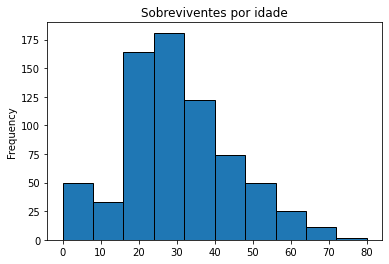

In [329]:
# Plotando histogramas para verificar a  relação de número de sobreviventes por idade
df_titanic_train['Age'].plot.hist(edgecolor='black', title= 'Sobreviventes por idade')

**Conclusão**

*Podemos observar que o maior número de sobrevivente está na faixa etária de 20 a 30 anos*

<AxesSubplot:title={'center':'Sobreviventes por classe (1ª, 2ª, 3ª)'}, ylabel='Frequency'>

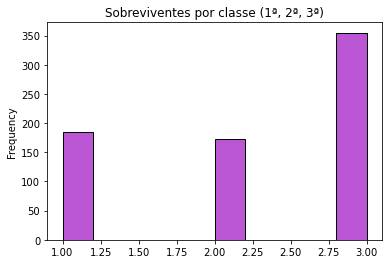

In [330]:
# Plotagem do histograma para verificar a quantidade de sobreviventes por classe econômica
df_titanic_train['Pclass'].plot.hist(edgecolor='black', title= 'Sobreviventes por classe (1ª, 2ª, 3ª)', color= '#BA55D3')

**Conclusão**

*Observa-se que o número de sobreviventes em relação a classe econômica se deu na terceira classe, ficando a primeira e seunga quase com a mesma quantidade, isto é, entre 150 e 200*

<AxesSubplot:title={'center':'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic'}, ylabel='Frequency'>

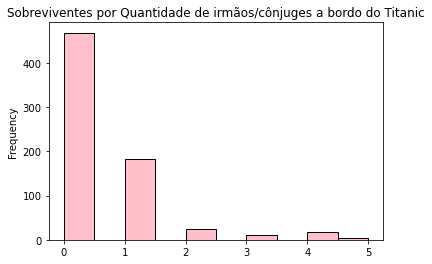

In [331]:
# Plotagem do hitograma da relação de sobreviventes por quantidade de irmãos e cônjuges
df_titanic_train['SibSp'].plot.hist(edgecolor='black', title= 'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic', color= 'pink')

**Conclusão**

*Sobreviveram mais pessoas que não tinham relaçao de parentesco no nível de cônjuge ou irmãos*

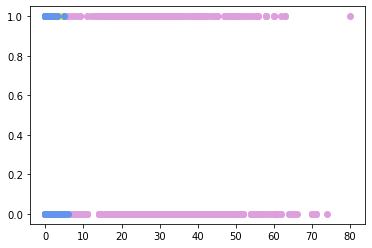

In [332]:
#gráfico de dispersão 
plt.scatter(df_titanic_train['Pclass'], df_titanic_train['Survived'], color= 'green')
plt.scatter(df_titanic_train['Age'], df_titanic_train['Survived'], color = 'Plum')
plt.scatter(df_titanic_train['SibSp'], df_titanic_train['Survived'], color = 'yellow')
plt.scatter(df_titanic_train['Parch'], df_titanic_train['Survived'], color = 'CornflowerBlue')

In [333]:
# Agrupamento por sexo para calcular a quantidade de sobreviventes. Esta forma foi escolhida pois as colunas ainda continham dados categóricos
# Mais à frente os valores categóricos serão substituidos por inteiros
colunas_selecionadas = ['Sex', 'Survived']

In [334]:
#Filtrando as colunas selecionadas no código anterior
df_titanic = df_titanic_train.filter(items=colunas_selecionadas)

In [335]:
df_titanic.head()

Sex  Survived
0    1         0
1    2         1
2    2         1
3    2         1
4    1         0

In [336]:
df_titanic.groupby(by=["Sex"]).count()

Survived
Sex          
1         453
2         259

In [337]:
# Exibindo as estatísticas das duas colunas filtradas no código logo enterior a este
df_titanic.groupby(by=["Sex"]).describe()

Survived                                             
       count      mean       std  min  25%  50%  75%  max
Sex                                                      
1      453.0  0.205298  0.404366  0.0  0.0  0.0  0.0  1.0
2      259.0  0.752896  0.432163  0.0  1.0  1.0  1.0  1.0

### **Transformando os dados das colunas Sex, Embarked em int ou float**

**Atribuindo valores numéricos à coluna "Sex"**

1 = male

2 = female

In [338]:
df_titanic_train.loc[df_titanic_train.Sex=='male','Sex'] = 1
df_titanic_train.loc[df_titanic_train.Sex=='female','Sex'] = 2

**Atribuindo valores numéricos à coluna "Embarked"**

3 = Cherbourg

4 = Queenstown

5 = Southampton

In [339]:
df_titanic_train.loc[df_titanic_train.Embarked=='S','Embarked'] = 3
df_titanic_train.loc[df_titanic_train.Embarked=='C','Embarked'] = 4
df_titanic_train.loc[df_titanic_train.Embarked=='Q','Embarked'] = 5

In [340]:
df_titanic_train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1   22      1      0   7.2500         3
1            2         1       1    2   38      1      0  71.2833         4
2            3         1       3    2   26      0      0   7.9250         3
3            4         1       1    2   35      1      0  53.1000         3
4            5         0       3    1   35      0      0   8.0500         3

**Verificando os tipos de dados das colunas**

In [341]:
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [342]:
df_titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**Tranformando os dados das colunas Sex, Age, Embarked e Survived (`float`) em dados do tipo `int`**

In [343]:
df_titanic_train['Sex']= df_titanic_train['Sex'].astype(int)
df_titanic_train['Age']= df_titanic_train['Age'].astype(int)
df_titanic_train['Embarked'] = df_titanic_train['Embarked'].astype(int)
df_titanic_train

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1   22      1      0   7.2500         3
1              2         1       1    2   38      1      0  71.2833         4
2              3         1       3    2   26      0      0   7.9250         3
3              4         1       1    2   35      1      0  53.1000         3
4              5         0       3    1   35      0      0   8.0500         3
..           ...       ...     ...  ...  ...    ...    ...      ...       ...
885          886         0       3    2   39      0      5  29.1250         5
886          887         0       2    1   27      0      0  13.0000         3
887          888         1       1    2   19      0      0  30.0000         3
889          890         1       1    1   26      0      0  30.0000         4
890          891         0       3    1   32      0      0   7.7500         5

[712 rows x 9 columns]

In [344]:
df_titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'Sobreviventes por sexo'}, ylabel='Frequency'>

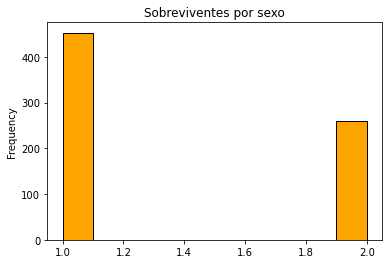

In [345]:
# plotagem do df com os sobrevivente por sexo utilizando 
df_titanic_train['Sex'].plot.hist(edgecolor='black', title= 'Sobreviventes por sexo', color= 'orange')

<AxesSubplot:title={'center':'Sobreviventes em relação ao porto de embarcação'}, ylabel='Frequency'>

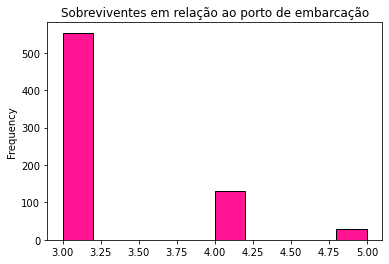

In [346]:
# Plotagem do df com os sobrevivente em relação ao porto de embarcação
df_titanic_train['Embarked'].plot.hist(edgecolor='black', title= 'Sobreviventes em relação ao porto de embarcação', color= '#FF1493')

**Dividindo o dataset em treino e teste**

In [347]:
# Separando as colunas exceto a Survived que será o y
X = df_titanic_train[df_titanic_train.columns[:-1]]
X

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
0              1         0       3    1   22      1      0   7.2500
1              2         1       1    2   38      1      0  71.2833
2              3         1       3    2   26      0      0   7.9250
3              4         1       1    2   35      1      0  53.1000
4              5         0       3    1   35      0      0   8.0500
..           ...       ...     ...  ...  ...    ...    ...      ...
885          886         0       3    2   39      0      5  29.1250
886          887         0       2    1   27      0      0  13.0000
887          888         1       1    2   19      0      0  30.0000
889          890         1       1    1   26      0      0  30.0000
890          891         0       3    1   32      0      0   7.7500

[712 rows x 8 columns]

In [348]:
# Separando os dados que irei estimar
y = df_titanic_train[df_titanic_train.columns[-1:]]

In [349]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size = 0.3, random_state=2)

In [350]:
X_test

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
472          473         1       2    2   33      1      2  27.7500
780          781         1       3    2   13      0      0   7.2292
314          315         0       2    1   43      1      1  26.2500
469          470         1       3    2    0      2      1  19.2583
725          726         0       3    1   20      0      0   8.6625
..           ...       ...     ...  ...  ...    ...    ...      ...
823          824         1       3    2   27      0      1  12.4750
474          475         0       3    2   22      0      0   9.8375
640          641         0       3    1   20      0      0   7.8542
203          204         0       3    1   45      0      0   7.2250
406          407         0       3    1   51      0      0   7.7500

[214 rows x 8 columns]

In [351]:
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

**Padronizando os dados em uma mesma escala**

In [352]:
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
scaled = scaler.transform(X_test)
X_test

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare
472          473         1       2    2   33      1      2  27.7500
780          781         1       3    2   13      0      0   7.2292
314          315         0       2    1   43      1      1  26.2500
469          470         1       3    2    0      2      1  19.2583
725          726         0       3    1   20      0      0   8.6625
..           ...       ...     ...  ...  ...    ...    ...      ...
823          824         1       3    2   27      0      1  12.4750
474          475         0       3    2   22      0      0   9.8375
640          641         0       3    1   20      0      0   7.8542
203          204         0       3    1   45      0      0   7.2250
406          407         0       3    1   51      0      0   7.7500

[214 rows x 8 columns]

3. Crie um classificador para predizer se um passageiro sobreviveu ou não a partir dos
atributos presentes no dataset. Utilize os algoritmos KNN, Regressão Logística e
Naive Bayes para criar os modelos. Crie um modelo para cada algoritmo.

## KNN

In [353]:
# Modelo de classificador para K=5
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(X_train,y_train)
pred_knn = model_knn.predict(X_test)
print("KNN:", model_knn.score(X_test, y_test))

KNN: 0.7523364485981309


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## **Regressão Logística**

In [354]:
log_reg = LogisticRegression()
model_reg = log_reg.fit(X_train,y_train)
pred_log_reg = model_reg.predict(X_test)
print("Regressão Logística:", model_reg.score(X_test, y_test))

Regressão Logística: 0.7663551401869159


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Acurácia e Kappa**

In [355]:
print("Acurácia:", model_reg.score(X_test, y_test))
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_log_reg))

Acurácia: 0.7663551401869159
Kappa: 0.12695822454308103


## **Naive Bayes**

In [356]:
naive = MultinomialNB()
model_naive = naive.fit(X_train,y_train)
pred_naive = model_naive.predict(X_test)
print("Naive Bayes:", model_naive.score(X_test, y_test))

Naive Bayes: 0.38317757009345793


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## **Matriz de Confusão**

In [357]:
matrix = metrics.confusion_matrix(y_test, pred_log_reg)
matrix_bayes = metrics.confusion_matrix(y_test, pred_naive)
matrix_knn = metrics.confusion_matrix(y_test, pred_knn)

In [358]:
matrix = metrics.confusion_matrix(y_test, predictions)

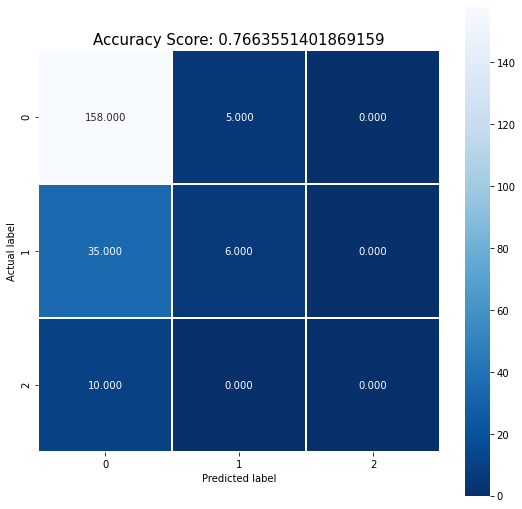

In [359]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_reg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);


# **Visão Geral do DF com `pandas_profiling`**

*Função do Python que exibe todas as estatísticas*

In [360]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [361]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [362]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [363]:
# Read the Titanic Dataset
titanic = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/train.csv",
)
df = pd.read_csv(titanic)

In [364]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="Titanic Dataset", html={"style": {"full_width": True}}, sort=None
)

In [365]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [366]:
# Or use the HTML report in an iframe
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Referências Bibliográficas**

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

https://medium.com/data-hackers/tratamento-e-transforma%C3%A7%C3%A3o-de-dados-nan-uma-vis%C3%A3o-geral-e-pr%C3%A1tica-54efa9fc7a98

https://www.youtube.com/watch?v=ojA65o8N0iM&t=684s

https://datatofish.com/check-nan-pandas-dataframe/

http://www.each.usp.br/lauretto/SIN5008_2011/aula01/aula1#:~:text=A%20%EF%AC%81nalidade%20da%20An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20%28AED%29,digita%C3%A7%C3%A3o%20de%20dados%20em%20um%20banco%20de%20dados

https://pypi.org/project/pandas-profiling/

https://www.youtube.com/watch?v=TRatkPjzHNE

https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=Uma%20das%20maneiras%20de%20fazer%20a%20divis%C3%A3o%20desses,dos%20dados%20para%20treino%20e%2030%25%20para%20teste.

https://minerandodados.com.br/7-tipos-graficos-cientista-de-dados/

https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn